# Facets

Google Research team has developed a tool for this job called Facets that help to visualize the data and slice it in all sorts of manners. This is a good starting point to comprehend how the dataset is laid out.

There are two parts to Facets:

- Facets Overview<br>
- Facets Deep Dive

## Facets Overview
Facets Overview gives an overview of the dataset. Facets Overview splits the columns of the data into rows of salient information showing

- the percentage of missing observation
- min and max values
- statistics like the mean, median, and standard deviation.
- It also adds a column that shows the percentage of values that are zeroes, which is helpful when most of the values are zeroes.
- It is possible to see these distributions on the test dataset as well as the training set for each feature. It means you can double-check that the test has a similar distribution to the training data.

This is at least the minimum to do before any machine learning task. With this tool, you do not miss this crucial step, and it highlights some abnormalities.

In [1]:
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from IPython.core.display import display, HTML
from sklearn.datasets import load_boston
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import base64
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [21]:
boston_data = load_boston()
model_dir = 'logs/8_facets_linear_reg'
df_boston = pd.DataFrame(boston_data.data)
print(boston_data.feature_names)

df_boston.columns = boston_data.feature_names
df_boston['CHAS'] = df_boston['CHAS'].map({1:'yes',0:'no'})  # converting float to yes/no value....it later helps while training the model
df_boston['PRICE'] = boston_data.target
display(df_boston.head())
display(df_boston.describe())

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
#Divide data into train and test sets
df_train = df_boston.sample(frac=0.8, random_state=200)
df_test = df_boston.drop(df_train.index)
print(df_train.shape)
print(df_test.shape)

(405, 14)
(101, 14)


To calculate the feature statistics, you need to use the function GenericFeatureStatisticsGenerator(), and you use the object ProtoFromDataFrames. You can pass the data frame in a dictionary.

In [4]:
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'Train Data', 'table': df_train},
                                  {'name': 'Test Data', 'table': df_test}])
proto_str = base64.b64encode(proto.SerializeToString()).decode('utf-8')

In [5]:
HTML_TEMPLATE = """
        <script src='3rdparty/webcomponents-lite.js'></script>
        <link rel="import" href="3rdparty/facets-jupyter.html" />
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = '{proto_str}';
        </script>"""
html = HTML_TEMPLATE.format(proto_str=proto_str)
display(HTML(html))

## Facets Deep Dive

Facets Deep Dive is a cool tool. It allows to have some clarity on your dataset and zoom all the way in to see an individual piece of data. It means you can facet the data by row and column across any of the features of the dataset.

We will use these two tools with the Boston dataset.

<b>Note: You cannot use Facets Overview and Facets Deep Dive at the same time.</b>

# Graph

After you check the data and their distribution, you can plot a correlation matrix. The correlation matrix computes the Pearson coefficient. This coefficient is bonded between -1 and 1, with a positive value indicates a positive correlation and negative value a negative correlation.

You are interested to see which variables can be a good candidate for interaction terms.

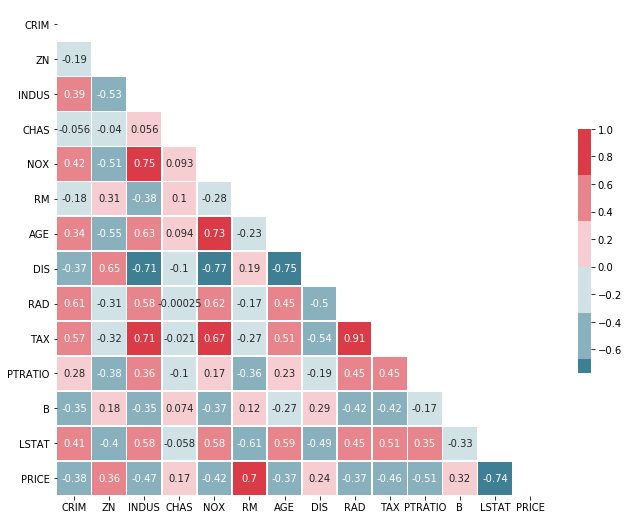

In [6]:
# Compute the correlation matrix
"""
In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r,
the Pearson product-moment correlation coefficient (PPMCC) or the bivariate correlation, is a measure of the 
linear correlation between two variables X and Y. 
According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 
1 is total positive linear correlation, 
0 is no linear correlation,and 
−1 is total negative linear correlation
"""
corr = df_train.corr('pearson')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10)  # A plot pallete style -> Make a diverging palette between two HUSL colors.
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, # to not show the upper triangle matrix and only show the bottom triangle
            cmap=cmap, # gives a good color gradient to the squares else looks ugly
            center=0,  # to make white square as 0 and other color relative to 0
            annot=True, # to show the numbers on the squares
            linewidths=.5, #the white lines to distinguish between squares
            cbar_kws={"shrink": .5})  # to shrink the side bar

From the above figure we can see that
- nox and dis are highly correlated
- indus and dis are also highly correlated
- age and dis are highly correlated
- Price and rm are highle -vely correlated
- Lstat and Price are also higly correlated

# Choosing the variables

The pair grid we are composed as follow:

Upper part: Scatter plot with fitted line<br>
Diagonal: Kernel density plot<br>
Lower part: Multivariate kernel density plot<br>

You choose the focus on four independent variables. The choice corresponds to the variables with strong correlation with PRICE
- INDUS
- NOX
- RM
- LSTAT

moreover, the PRICE.

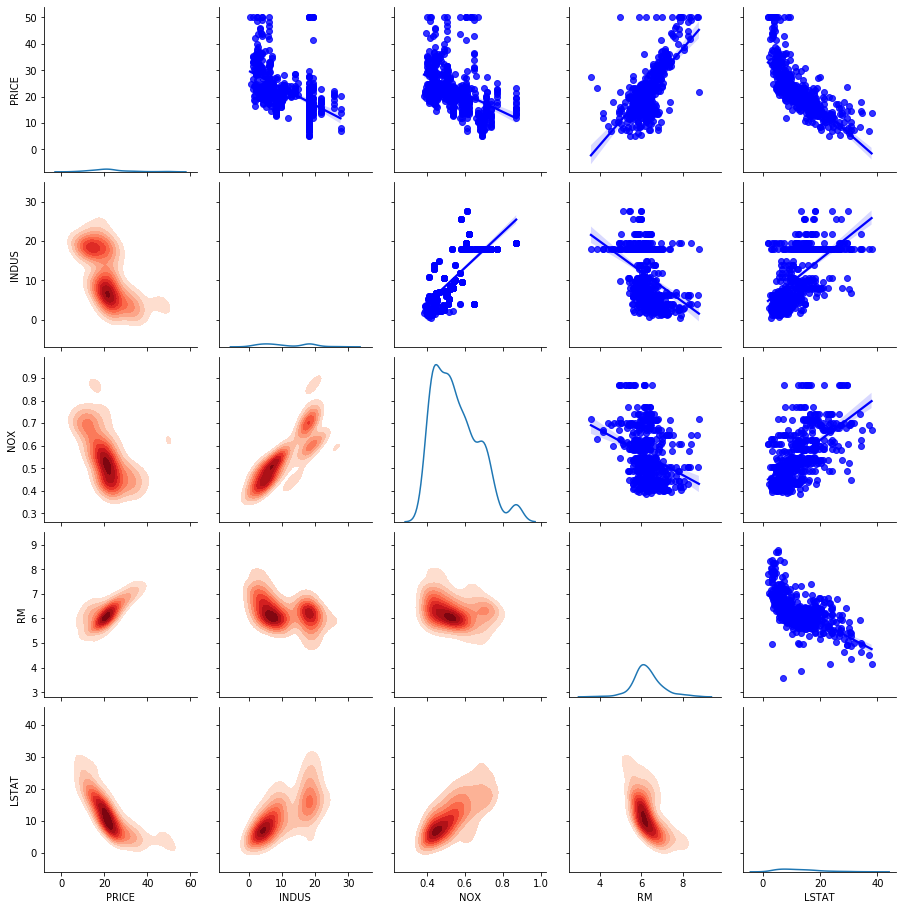

In [7]:
attributes = ["PRICE", "INDUS", "NOX", "RM", "LSTAT"]
g = sns.PairGrid(df_boston[attributes])
g = g.map_upper(sns.regplot, color="b")
'''
Kernel density estimation -> KDE
Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.
KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
It depicts the probability density at different values in a continuous variable.
'''
g = g.map_lower(sns.kdeplot,cmap="Reds", shade=True, shade_lowest=False)
g = g.map_diag(sns.kdeplot)

Understanding the upper part:
- Price is negatively correlated with INDUS, NOX, and LSTAT; positively correlated with RM.
- There is a slightly non-linearity with LSTAT and PRICE

From the diagonal part:
- NOX seems to have two clusters, one around 0.5 and one around 0.85.

From the lower part:
- For INDUS and NOX, you can see the positive correlation and the two clusters. When the share of the industry is above 18, the nitric oxides concentration is above 0.6.

You can think about adding an interaction between INDUS and NOX in the linear relationship.

## Using Facets Deep Drive

The interface is divided up into four main sections. The central area in the center is a zoomable display of the data. On the top of the panel, there is the drop-down menu where you can change the arrangement of the data to controls faceting, positioning, and color. On the right, there is a detailed view of a specific row of data. It means you can click on any dot of data in the center visualization to see the detail about that particular data point.

To open Deep Dive, you need to transform the data into a json format. Pandas as an object for that. You can use to_json after the Pandas dataset.

Here we will categorize our PRICE data into 4 subsets and show with different colors, to get a better understanding of the data.

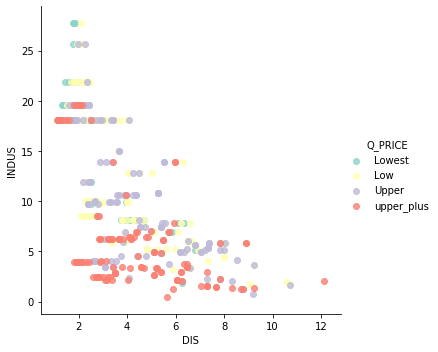

In [8]:
# Categoriaing PRICE
df_boston['Q_PRICE'] =  pd.qcut(df_boston['PRICE'], 4, labels=["Lowest", "Low", "Upper", "upper_plus"])

# visualizing Q_PRICE vs DIS vs INDUS
sns.lmplot(x='DIS', y = 'INDUS', hue = 'Q_PRICE', data= df_boston,
          fit_reg = False,    #removes regularized line
          palette = 'Set3')   #lightens the color pallete

To open Deep Dive, you need to transform the data into a json format. Pandas as an object for that. You can use to_json after the Pandas dataset.

In [9]:
# set the sprite_size based on the number of records in dataset,
# larger datasets can crash the browser if the size is too large (>50000)
sprite_size = 32 if len(df_boston.index) > 50000 else 64
jsonstr = df_boston.to_json(orient='records')

In [10]:
HTML_TEMPLATE = """
        <script src='3rdparty/webcomponents-lite.js'></script>
        <link rel="import" href="3rdparty/facets-jupyter.html"/>
        <facets-dive sprite-image-width="{sprite_size}" sprite-image-height="{sprite_size}" id="elem" height="800">
        </facets-dive>
        <script>
          document.querySelector("#elem").data = {jsonstr};
        </script>"""

# Load the json dataset and the sprite_size into the template
html = HTML_TEMPLATE.format(jsonstr=jsonstr, sprite_size=sprite_size)

# Display the template
display(HTML(html))

# Creating a model

## Preparing the data

Standardization means a standard deviation of one and means of zero. The process of standardization involves two steps. First of all, it subtracts the mean value of the variable. Secondly, it divides by the variance so that the distribution has a unit variance

The library sklearn is helpful to standardize variables. You can use the module preprocessing with the object scale for this purpose.

In [32]:
def standardize_data(df):
    X_scaled = preprocessing.scale(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']])
    X_scaled_df = pd.DataFrame(X_scaled, columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
    df_scale = pd.concat([X_scaled_df,
                       df['CHAS'],   #categorical value and not a continuous value like others
                       df['PRICE']],axis=1, join='inner')
    return df_scale

In [90]:
df_train_scaled = standardize_data(df_train)
df_test_scaled = standardize_data(df_test)
display(df_train_scaled.head(5))
display(df_test_scaled.head(5))

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,PRICE
2,-0.278174,-0.47701,-0.464046,-0.162933,-0.188265,0.812916,0.105941,-0.661477,-0.616881,1.147718,0.444455,0.803221,no,34.7
4,1.014608,-0.47701,0.992729,1.594192,-0.595967,0.987593,-0.907724,1.636106,1.502932,0.776192,-1.278797,1.504488,no,36.2
5,-0.409562,-0.47701,-1.155868,-0.589166,1.036257,0.620414,-0.164461,-0.891235,-0.835358,-0.338387,0.444455,-1.025327,no,28.7
8,-0.370330,-0.47701,-0.747795,-0.432591,-0.157121,0.798656,-0.346465,-0.201960,-0.616881,-0.524150,0.426162,1.182209,no,16.5
9,1.828346,-0.47701,0.992729,1.246247,-2.699598,0.795092,-1.129861,1.636106,1.502932,0.776192,-0.779497,2.450575,no,18.9


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,PRICE
0,-0.455387,0.189477,-1.181384,-0.071951,0.368881,-0.073558,0.066379,-0.894411,-0.606306,-1.315397,0.427853,-0.999447,no,24.0
1,-0.452373,-0.530416,-0.488967,-0.653853,0.143179,0.409507,0.449558,-0.778448,-0.936128,-0.166529,0.427853,-0.372455,no,21.6
3,-0.443619,-0.030491,-0.372594,-0.190018,-0.456251,-0.024193,0.708796,-0.430557,-0.514689,-1.361351,0.413877,0.123411,no,33.4
6,-0.431165,-0.530416,-0.650434,-0.400852,-0.523669,-1.307663,-0.039649,-0.430557,-0.710139,0.476837,0.390548,-0.223243,no,22.9
7,-0.435981,-0.530416,-0.512241,-0.830954,-0.226152,-2.139802,0.778870,-0.662484,-0.991098,-0.120574,0.282394,-0.874350,no,27.1


## Basic Regression: Benchmark

First of all, you train and test a model without interaction. The purpose is to see the performance metric of the model. We will be using the tensorflow estimator. We need to do the following:
- define the features to put in the model
- transform the features
- construct the linear regressor
- construct the input_fn function
- train the model
- test the model

In [61]:
# Define the features
CONTI_FEATURES  = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
CATE_FEATURES = ['CHAS']
continuous_features = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES]
categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list('CHAS', ['yes','no'])]

In [62]:
# create a linear regressor model
model =  tf.estimator.LinearRegressor(model_dir = model_dir, feature_columns= continuous_features + categorical_features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/8_facets_linear_reg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc607310f10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [75]:
# create the input function
FEATURES = CONTI_FEATURES + CATE_FEATURES
def get_input_fn(df, feature_columns, num_epoch=None, batch_size = 128, shuffle = False):
    Label = 'PRICE'
    return tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({k: df[k].values for k in feature_columns}), #Rearranging the shuffled data frame so that index of x and y match
    y = pd.Series(df[Label].values),
    batch_size = batch_size,
    num_epochs = num_epoch,
    shuffle = shuffle)

In [64]:
# train the model
model.train(input_fn=get_input_fn(df_train_scaled, FEATURES,num_epoch= None, batch_size= 128,shuffle=False), steps= 1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/8_facets_linear_reg/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into logs/8_facets_linear_reg/model.ckpt.
INFO:tensorflow:loss = 3904.944,

### Estimating Performance

In [66]:
bench_result = model.evaluate(input_fn = get_input_fn(df_train_scaled, FEATURES,num_epoch=1, batch_size=128,shuffle=False), steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-14T17:01:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/8_facets_linear_reg/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-14-17:01:56
INFO:tensorflow:Saving dict for global step 2000: average_loss = 89.896416, global_step = 2000, label/mean = 23.7

Here we can see that the loss is 9738.778

## Improving the model

Before you saw that there is an interesting relationship between the variables. The different visualization techniques revealed that INDUS and NOS are linked together and turns to magnify the effect on the price. Not only the interaction between INDUS and NOS affects the price but also this effect is stronger when it interacts with DIS.

Now we need to add 2 columns:
    create one function to compute the interaction term and another one to compute the triple interaction term. Each function produces a single column. After the new variables are created, you can concatenate them to the training dataset and test dataset.

In [91]:
def interaction_term(var1, var2, name):
    t_train = df_train_scaled[var1]*df_train_scaled[var2]
    train = t_train.rename(name)
    t_test = df_test_scaled[var1]*df_test_scaled[var2]
    test = t_test.rename(name)
    return train, test

In [92]:
interation_ind_ns_train, interation_ind_ns_test= interaction_term('INDUS', 'NOX', 'INDUS_NOS')
interation_ind_ns_train.shape

(325,)

In [93]:
def triple_interaction_term(var_1, var_2,var_3, name):
    t_train = df_train_scaled[var_1]*df_train_scaled[var_2]*df_train_scaled[var_3]
    train = t_train.rename(name)
    t_test = df_test_scaled[var_1]*df_test_scaled[var_2]*df_test_scaled[var_3]
    test = t_test.rename(name)
    return train, test

In [94]:
interation_ind_ns_dis_train, interation_ind_ns_dis_test= triple_interaction_term('INDUS', 'NOX', 'DIS','INDUS_NOS_DIS')

In [95]:
# addding the new columns and creating new dataframes for test and training
df_train_new = pd.concat([df_train_scaled,
                          interation_ind_ns_train,
                          interation_ind_ns_dis_train],
                         axis=1, join='inner')
df_test_new = pd.concat([df_test_scaled,
                         interation_ind_ns_test,
                         interation_ind_ns_dis_test],
                         axis=1, join='inner')
display(df_train_new.head(5))
display(df_test_new.head(5))

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,PRICE,INDUS_NOS,INDUS_NOS_DIS
2,-0.278174,-0.47701,-0.464046,-0.162933,-0.188265,0.812916,0.105941,-0.661477,-0.616881,1.147718,0.444455,0.803221,no,34.7,0.075608,0.008010
4,1.014608,-0.47701,0.992729,1.594192,-0.595967,0.987593,-0.907724,1.636106,1.502932,0.776192,-1.278797,1.504488,no,36.2,1.582601,-1.436565
5,-0.409562,-0.47701,-1.155868,-0.589166,1.036257,0.620414,-0.164461,-0.891235,-0.835358,-0.338387,0.444455,-1.025327,no,28.7,0.680999,-0.111997
8,-0.370330,-0.47701,-0.747795,-0.432591,-0.157121,0.798656,-0.346465,-0.201960,-0.616881,-0.524150,0.426162,1.182209,no,16.5,0.323489,-0.112078
9,1.828346,-0.47701,0.992729,1.246247,-2.699598,0.795092,-1.129861,1.636106,1.502932,0.776192,-0.779497,2.450575,no,18.9,1.237185,-1.397847


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,PRICE,INDUS_NOS,INDUS_NOS_DIS
0,-0.455387,0.189477,-1.181384,-0.071951,0.368881,-0.073558,0.066379,-0.894411,-0.606306,-1.315397,0.427853,-0.999447,no,24.0,0.085002,0.005642
1,-0.452373,-0.530416,-0.488967,-0.653853,0.143179,0.409507,0.449558,-0.778448,-0.936128,-0.166529,0.427853,-0.372455,no,21.6,0.319712,0.143729
3,-0.443619,-0.030491,-0.372594,-0.190018,-0.456251,-0.024193,0.708796,-0.430557,-0.514689,-1.361351,0.413877,0.123411,no,33.4,0.070800,0.050182
6,-0.431165,-0.530416,-0.650434,-0.400852,-0.523669,-1.307663,-0.039649,-0.430557,-0.710139,0.476837,0.390548,-0.223243,no,22.9,0.260728,-0.010338
7,-0.435981,-0.530416,-0.512241,-0.830954,-0.226152,-2.139802,0.778870,-0.662484,-0.991098,-0.120574,0.282394,-0.874350,no,27.1,0.425649,0.331525


In [96]:
#creating feature columns for the new columns and old ones
CONTI_FEATURES_NEW  = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'INDUS_NOS', 'INDUS_NOS_DIS']
#using same previously defined categorical list
continuous_features_new = [tf.feature_column.numeric_column(k) for k in CONTI_FEATURES_NEW]
model_new = tf.estimator.LinearRegressor(
    model_dir="logs/8_facets_linear_reg/train_Boston_1", 
    feature_columns= categorical_features + continuous_features_new)  ## using the same old categorical feature column

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logs/8_facets_linear_reg/train_Boston_1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc6044ea490>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
FEATURES_NEW = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT','INDUS_NOS', 'INDUS_NOS_DIS','CHAS']
LABEL= 'PRICE'
##using the same old get_input_fn
model_new.train(input_fn=get_input_fn(df_train_new,
                                    FEATURES_NEW,
                                    num_epoch=None,
                                    batch_size = 128,
                                    shuffle=False),
            steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/8_facets_linear_reg/train_Boston_1/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2000 into logs/8_facets_linear_reg/train_Boston_1/model.ckpt.
INFO:tensorflow:loss = 5351.3574, step = 2000
INFO:tensorflow:global_ste

In [98]:
#evaluating this new model
model_new.evaluate(input_fn=get_input_fn(df_test_new,
                                      FEATURES_NEW,
                                      num_epoch=1,
                                      batch_size = 128,
                                      shuffle=False),
                steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-15T12:13:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/8_facets_linear_reg/train_Boston_1/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-15-12:13:59
INFO:tensorflow:Saving dict for global step 3000: average_loss = 58.48744, global_step = 3000, lab

{'average_loss': 58.48744,
 'label/mean': 26.01579,
 'loss': 1111.2614,
 'prediction/mean': 22.556768,
 'global_step': 3000}

## Conclusion

As we can see here, the model has improved after addition of new columns above.<br>
The new model has a loss of 1111.26 compared to previous model's loss of 9738.77